In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
df_desc = []
for i in df.columns:
    df_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum())/ (len(df))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
df_desc = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])
df_desc

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [4]:
df.drop(['id', 'date'],axis=1, inplace=True)

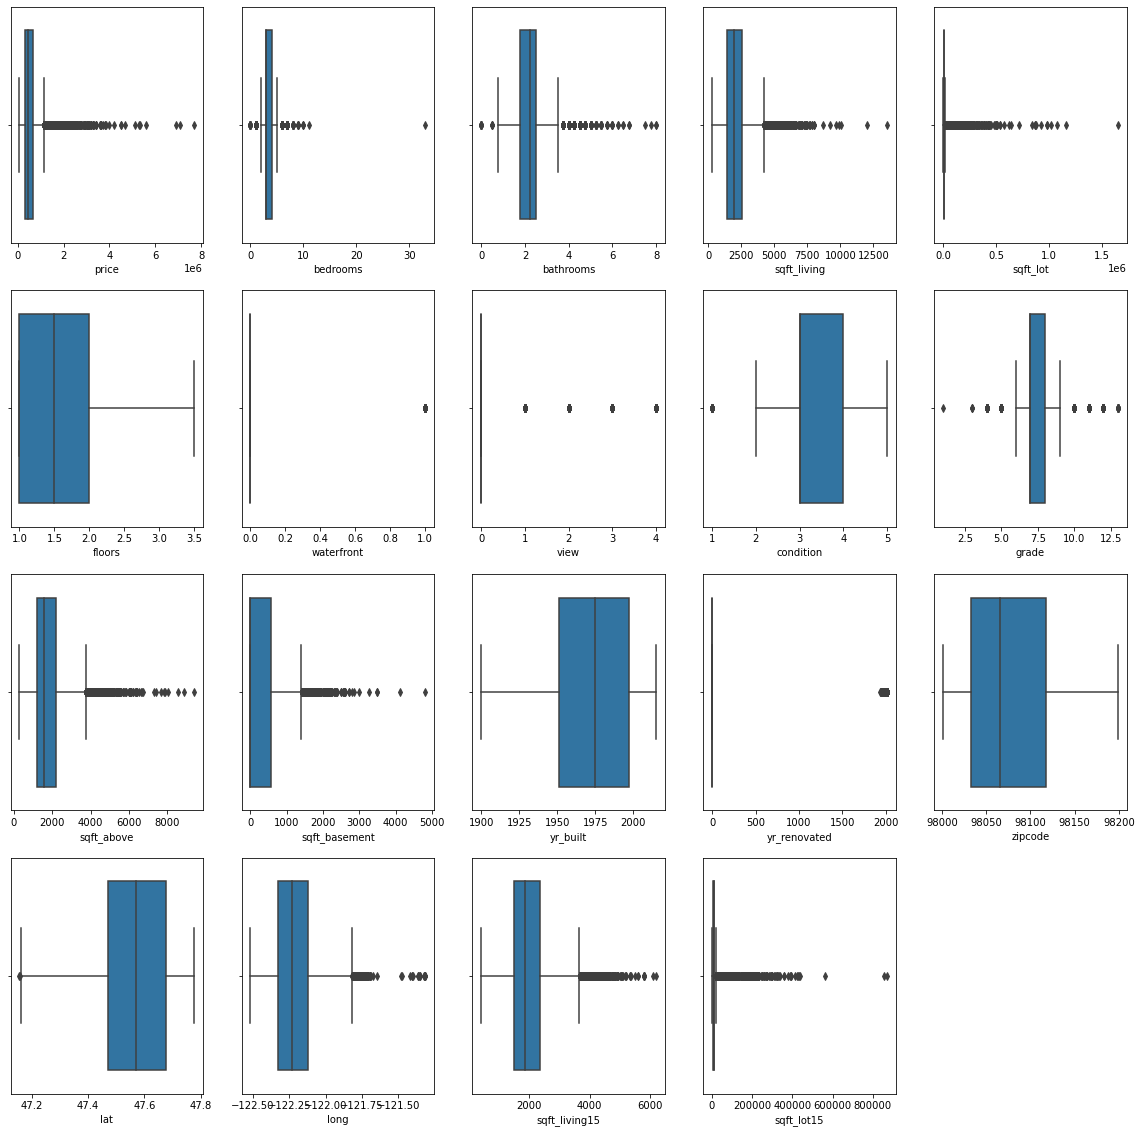

In [5]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

In [96]:
df[df['bedrooms'] < 1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [6]:
df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [9]:
i = df[((df.bedrooms > 30))].index
df.drop(i, inplace=True)

## Mencari korelasi 

In [47]:
correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns='price')
y = (df['price'])

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=69)

# Base Model

## Linnear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()

In [13]:
linreg.fit(X_train, y_train)

LinearRegression()

In [36]:
linreg_train = linreg.score(X_train, y_train)

In [37]:
linreg.score(X_test, y_test)

0.7021075373604584

In [15]:
y_pred =  linreg.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
r2_linreg = linreg.score(X_test, y_test)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

In [18]:
print('Hasil Evaluation Matrix LinReg : ')
print("")
print(f'MAE: {MAE_linreg}')
print(f'MSE:{MSE_linreg}')
print(f"RMSE : {RMSE_linreg}")
print(f"R2 : {r2_linreg}")

Hasil Evaluation Matrix LinReg : 

MAE: 125198.18134824338
MSE:38176576676.45185
RMSE : 195388.27159390057
R2 : 0.7021075373604584


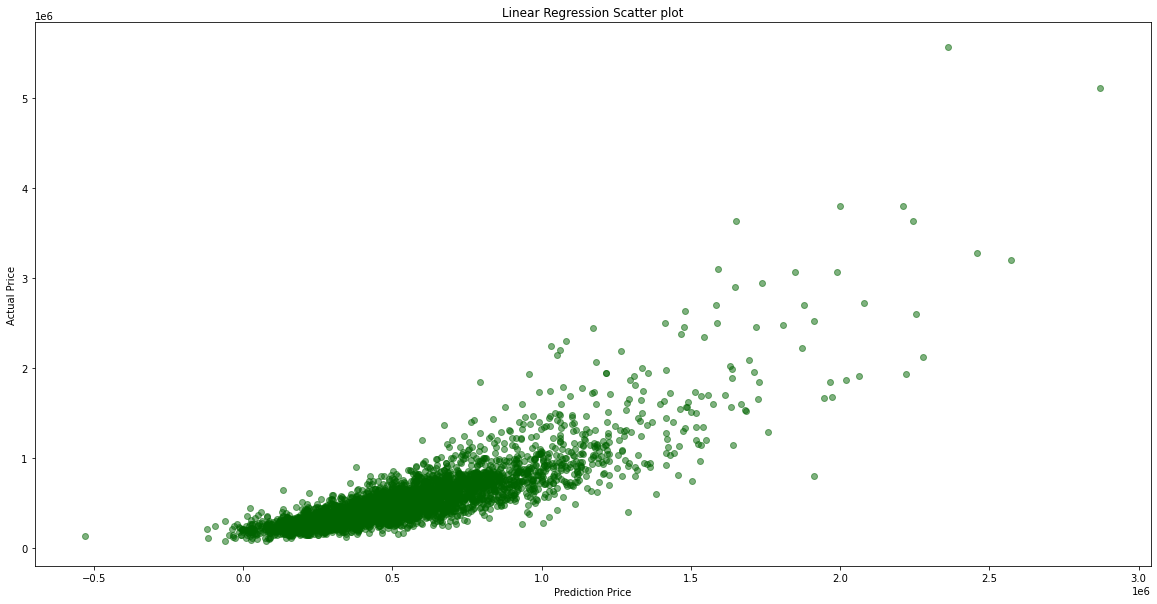

In [19]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_pred, y_test, color= 'darkgreen', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

## XGBoost

In [20]:
from xgboost import XGBRegressor

In [21]:
base_XGB = XGBRegressor()

In [22]:
base_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_base_XGB = base_XGB.predict(X_test)

In [39]:
XGB_train = base_XGB.score(X_train, y_train)

In [24]:
base_XGB.score(X_test, y_test)

0.892208604223333

In [25]:
r2_XGB = base_XGB.score(X_test, y_test)
MAE_XGB = mean_absolute_error(y_test, y_base_XGB)
MSE_XGB = mean_squared_error(y_test, y_base_XGB)
RMSE_XGB = np.sqrt(MSE_XGB)

In [26]:
print('Hasil Evaluation Matrix XGBoost : ')
print("")
print(f'MAE: {MAE_XGB}')
print(f'MSE:{MSE_XGB}')
print(f"RMSE : {RMSE_XGB}")
print(f"R2 : {r2_XGB}")

Hasil Evaluation Matrix XGBoost : 

MAE: 66085.01626113232
MSE:13814067161.911015
RMSE : 117533.25981147215
R2 : 0.892208604223333


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
base_RF = RandomForestRegressor()

In [29]:
base_RF.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_RF = base_RF.predict(X_test)

In [40]:
RF_train = base_RF.score(X_train, y_train)

In [31]:
r2_base_RF = r2_score(y_test, y_RF)
r2_base_RF

0.8852643878964712

In [32]:
r2_base_RF = base_RF.score(X_test, y_test)
MAE_RF = mean_absolute_error(y_test, y_RF)
MSE_RF = mean_squared_error(y_test, y_RF)
RMSE_RF = np.sqrt(MSE_RF)

In [33]:
print('Hasil Evaluation Matrix RandomForest : ')
print("")
print(f'MAE: {MAE_RF}')
print(f'MSE:{MSE_RF}')
print(f"RMSE : {RMSE_RF}")
print(f"R2 : {r2_base_RF}")

Hasil Evaluation Matrix RandomForest : 

MAE: 67074.3045637601
MSE:14704007124.511185
RMSE : 121260.08050678173
R2 : 0.8852643878964712


## Summary

In [42]:
data = {'LinReg': [r2_linreg,MAE_linreg,MSE_linreg,RMSE_linreg],
        'Linreg Train':[linreg_train, np.nan, np.nan, np.nan],
       'XGB':[r2_XGB, MAE_XGB, MSE_XGB, RMSE_XGB],
        'XGB Train':[XGB_train, np.nan, np.nan, np.nan],
       'RF':[r2_base_RF, MAE_RF, MSE_RF, RMSE_RF],
        'RF Train':[RF_train, np.nan, np.nan, np.nan],
        }

In [44]:
df_score =  pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
df_score

,LinReg,Linreg Train,XGB,XGB Train,RF,RF Train
R2,7.021075e-01,0.69968,8.922086e-01,0.975125,8.852644e-01,0.981922
MAE,1.251982e+05,NaN,6.608502e+04,NaN,6.707430e+04,NaN
MSE,3.817658e+10,NaN,1.381407e+10,NaN,1.470401e+10,NaN
RMSE,1.953883e+05,NaN,1.175333e+05,NaN,1.212601e+05,NaN


## Hyperparameter Tuning

## Random Forest

In [47]:
param_RF = {"n_estimators" : [100, 500, 1000],
          "max_depth" : [None, 5, 9, 20, ],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [ 1, 4, 10],
          "max_features" : ['auto', .8, .5]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:
model_RF = RandomizedSearchCV(estimator=base_RF, param_distributions=param_RF, cv = 5, n_jobs=-1, verbose=1)

In [50]:
model_RF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 9, 20],
                                        'max_features': ['auto', 0.8, 0.5],
                                        'min_samples_leaf': [1, 4, 10],
                                        'min_samples_split': [2, 9, 15],
                                        'n_estimators': [100, 500, 1000]},
                   verbose=1)

In [51]:
model_RF.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 0.8,
 'max_depth': 20}

In [52]:
RF_tuned = model_RF.best_estimator_

In [53]:
y_tunedRF = RF_tuned.predict(X_test)

In [54]:
RF_train_tuned = RF_tuned.score(X_train, y_train)

In [55]:
r2_tuned_RF = r2_score(y_test, y_tunedRF)
r2_tuned_RF

0.878693642779905

In [56]:
r2_model_RF = RF_tuned.score(X_test, y_test)
MAE_RF_tuned = mean_absolute_error(y_test, y_tunedRF)
MSE_RF_tuned = mean_squared_error(y_test, y_tunedRF)
RMSE_RF_tuned = np.sqrt(MSE_RF_tuned)

In [57]:
print('Hasil Evaluation Matrix RandomForest : ')
print("")
print(f'MAE: {MAE_RF_tuned}')
print(f'MSE:{MSE_RF_tuned}')
print(f"RMSE : {RMSE_RF_tuned}")
print(f"R2 : {r2_model_RF}")

Hasil Evaluation Matrix RandomForest : 

MAE: 68255.52715598434
MSE:15546084673.37332
RMSE : 124683.93911556259
R2 : 0.878693642779905


## XGBoost

In [59]:
param_XGB = {'max_depth':[3,6,8],
             'min_child_weight':[1,3,6],
             'subsample':[1,0.5,0.3],
             'gamma':[0,3,5]}

In [60]:
model_XGB = RandomizedSearchCV(estimator=base_XGB, param_distributions=param_XGB, cv = 5, n_jobs=-1, verbose=1)

In [61]:
model_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [62]:
model_XGB.best_params_

{'subsample': 1, 'min_child_weight': 6, 'max_depth': 3, 'gamma': 5}

In [63]:
XGB_tuned = model_XGB.best_estimator_

In [64]:
y_tunedXGB = XGB_tuned.predict(X_test)

In [65]:
XGB_train_tuned = XGB_tuned.score(X_train, y_train)

In [66]:
r2_tuned_RF = r2_score(y_test, y_tunedXGB)
r2_tuned_RF

0.8822970489099081

In [67]:
r2_model_XGB = XGB_tuned.score(X_test, y_test)
MAE_XGB_tuned = mean_absolute_error(y_test, y_tunedXGB)
MSE_XGB_tuned = mean_squared_error(y_test, y_tunedXGB)
RMSE_XGB_tuned = np.sqrt(MSE_XGB_tuned)

In [68]:
print('Hasil Evaluation Matrix RandomForest : ')
print("")
print(f'MAE: {MAE_XGB_tuned}')
print(f'MSE:{MSE_XGB_tuned}')
print(f"RMSE : {RMSE_XGB_tuned}")
print(f"R2 : {r2_model_XGB}")

Hasil Evaluation Matrix RandomForest : 

MAE: 72953.55154117511
MSE:15084288127.064205
RMSE : 122818.10993116692
R2 : 0.8822970489099081


In [69]:
data2 = {'LinReg': [r2_linreg,MAE_linreg,MSE_linreg,RMSE_linreg],
        'Linreg Train':[linreg_train, np.nan, np.nan, np.nan],
       'XGB':[r2_model_XGB, MAE_XGB_tuned, MSE_XGB_tuned, RMSE_XGB_tuned],
        'XGB Train':[XGB_train_tuned, np.nan, np.nan, np.nan],
       'RF':[r2_model_RF, MAE_RF_tuned, MSE_RF_tuned, RMSE_RF_tuned],
        'RF Train':[RF_train_tuned, np.nan, np.nan, np.nan],
        }

## Evaluation Matrix Before Tuning

In [71]:
df_score

,LinReg,Linreg Train,XGB,XGB Train,RF,RF Train
R2,7.021075e-01,0.69968,8.922086e-01,0.975125,8.852644e-01,0.981922
MAE,1.251982e+05,NaN,6.608502e+04,NaN,6.707430e+04,NaN
MSE,3.817658e+10,NaN,1.381407e+10,NaN,1.470401e+10,NaN
RMSE,1.953883e+05,NaN,1.175333e+05,NaN,1.212601e+05,NaN


## Evaluation Matrix After Tuning

In [70]:
df_score_tuned = pd.DataFrame(data = data2, index = ['R2', 'MAE', 'MSE', 'RMSE'])
df_score_tuned

,LinReg,Linreg Train,XGB,XGB Train,RF,RF Train
R2,7.021075e-01,0.69968,8.822970e-01,0.926266,8.786936e-01,0.944925
MAE,1.251982e+05,NaN,7.295355e+04,NaN,6.825553e+04,NaN
MSE,3.817658e+10,NaN,1.508429e+10,NaN,1.554608e+10,NaN
RMSE,1.953883e+05,NaN,1.228181e+05,NaN,1.246839e+05,NaN


## Conclusion
- XGBoost with HyperParameter Tuning has the Higest evaluation matrix to predict house prices in King County with the accuracy of 88 % 